In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyspedas
from pyspedas import psp
import cdflib
import os


In [2]:
trange = ['2024-03-27T00:00:00', '2024-03-27T24:00:00']

In [3]:
# Get the magnetic field data from pyspedas.
psp_fields = pyspedas.psp.fields(trange, 
                                 datatype='mag_SC_4_Sa_per_Cyc',    # This is the downsampled 4 samples per NY second (0.87 s = 1 NYs) data. You will load in the high resolution data later!
                                 level='l2',                        # l2 is the first level of public data that is available to the public. 
                                 notplot=True,                      # You can play around with this if you want to use the tplot functions. I do not like tplot values.
                                 downloadonly=True,                 # Since we are not using the tplot values, and we do not want to read the data with pyspedas I always set this to be True.
                                 last_version=True,                 # Ensures we are looking at the most up to data data product
                                 get_support_data=False)#,          # Loads in additional support data, only useful for certain PSP data products. Default is false.
                                 # username=username,           If we go to the latest Parker Solar Probe encounter we can give you a username and password
                                 # password=password)

03-Jul-25 15:25:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_sc_4_per_cycle/2024/
03-Jul-25 15:25:09: File is current: psp_data/fields/l2/mag_sc_4_per_cycle/2024/psp_fld_l2_mag_sc_4_sa_per_cyc_20240327_v02.cdf


09-Jun-25 08:45:26: File is current: psp_data/fields/l2/mag_sc_4_per_cycle/2024/psp_fld_l2_mag_sc_4_sa_per_cyc_20240327_v02.cdf


In [4]:
# Get the solar wind data from pyspedas.
psp_spc = pyspedas.psp.spc(trange, 
                           datatype='l3i',
                           level='l3',
                           notplot=True,
                           downloadonly=True,
                           last_version=True,
                           get_support_data=False)

03-Jul-25 15:25:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2024/


Using LEVEL=L3


03-Jul-25 15:25:09: File is current: psp_data/sweap/spc/l3/l3i/2024/psp_swp_spc_l3i_20240327_v02.cdf


In [5]:
print(psp_fields)
print(psp_spc)

['psp_data/fields/l2/mag_sc_4_per_cycle/2024/psp_fld_l2_mag_sc_4_sa_per_cyc_20240327_v02.cdf']
['psp_data/sweap/spc/l3/l3i/2024/psp_swp_spc_l3i_20240327_v02.cdf']


In [6]:
fields_xr = cdflib.xarray.cdf_to_xarray(psp_fields[0])
spc_xr    = cdflib.xarray.cdf_to_xarray(psp_spc[0])

In [7]:
fields_xr
spc_xr

<xarray.Dataset> Size: 82MB
Dimensions:                         (Epoch: 190288, array32_index: 32,
                                     vector_index: 3, dim0: 3, dim1: 32)
Coordinates: (12/51)
  * Epoch                           (Epoch) datetime64[ns] 2MB 2024-03-27T00:...
    np_fit_uncertainty              (Epoch) float32 761kB 93.38 ... 18.15
    wp_fit_uncertainty              (Epoch) float32 761kB 1.058 1.438 ... 2.541
    vp_fit_SC_uncertainty           (Epoch, vector_index) float32 2MB 31.37 ....
    vp_fit_RTN_uncertainty          (Epoch, vector_index) float32 2MB 0.9257 ...
    np1_fit_uncertainty             (Epoch) float32 761kB 24.1 8.011 ... 18.01
    ...                              ...
    v3_fit_SC_uncertainty_LABL_1    (vector_index) <U22 264B 'v3_fit_xSC_unce...
    v3_fit_RTN_LABL_1               (vector_index) <U8 96B 'v3_fit_R' ... 'v3...
    v3_fit_RTN_uncertainty_LABL_1   (vector_index) <U20 240B 'v3_fit_R_uncert...
    HCI_LABL                        (vector_index) <U5 60B 'x_HCI' ... 'z_HCI'
    VHECI_LABL                      (vector_index) <U6 72B 'Vx_HCI' ... 'Vz_HCI'
  * array32_index                   (array32_index) uint8 32B 255 255 ... 255
Dimensions without coordinates: dim0, dim1
Data variables: (12/31)
    DQF                             (Epoch, array32_index) int8 6MB 1 1 ... -1
    np_fit                          (Epoch) float32 761kB 215.1 204.8 ... 368.5
    wp_fit                          (Epoch) float32 761kB 66.46 64.44 ... 52.95
    vp_fit_SC                       (Epoch, vector_index) float32 2MB -99.24 ...
    vp_fit_RTN                      (Epoch, vector_index) float32 2MB 257.2 ....
    np1_fit                         (Epoch) float32 761kB 215.1 204.8 ... 368.5
    ...                              ...
    carr_longitude                  (Epoch) float32 761kB 15.25 15.25 ... 13.85
    SC_frame                        (dim0) <U4 48B 'X_SC' 'Y_SC' 'Z_SC'
    unit_velocity                   (dim0) <U4 48B 'km/s' 'km/s' 'km/s'
    RTN_FRAME                       (dim0) <U1 12B 'R' 'T' 'N'
    DQF_flagnames                   (dim1) <U70 9kB '(0) general flag        ...
    general_flag                    (Epoch) int8 190kB 1 0 0 0 0 0 ... 0 0 0 0 0
Attributes: (12/25)
    Project:                     ['LWS>Living With a Star']
    Source_name:                 ['PSP>Parker Solar Probe']
    Discipline:                  ['Solar Physics>Heliospheric Physics', 'Spac...
    Data_type:                   ['L3i>Solar Wind Ion velocity moments and fi...
    Descriptor:                  ['SWP_SPC>Solar Wind Electrons Alphas and Pr...
    File_naming_convention:      ['source_descriptor_datatype_yyyyMMdd']
    ...                          ...
    Acknowledgement:             ['This project acknowledges the Parker Solar...
    MODS:                        ['2018-12-04: CDF skeleton created (MLS)', '...
    LINK_TITLE:                  ['SWEAP instrument paper', 'Smithsonian Astr...
    HTTP_LINK:                   ['https://link.springer.com/article/10.1007/...
    spase_DatasetResourceID:     ['spase://VSO/NumericalData/LWS/PSP/SPC/TBD']
    Calibrations_used:           ['psp_swp_spc_calfiles_sensorgainoffsets_201...

In [8]:
dqf = spc_xr.DQF.data
dqf.shape
mask_peaktrack = dqf[:,16] == 0
mask_fullscan = dqf[:,16] == 1
mask_pt = dqf[mask_peaktrack, 16]
mask_fs = dqf[mask_fullscan, 16]
mask_pt.shape

(184344,)

In [9]:
time = fields_xr.epoch_mag_SC_4_Sa_per_Cyc

In [10]:
ex_fields_xr = fields_xr.copy()
ex_fields_xr.rename({'epoch_mag_SC_4_Sa_per_Cyc' : 'time'})

<xarray.Dataset> Size: 8MB
Dimensions:                         (time: 395507, component_index_SC: 3,
                                     epoch_mag_SC_zero: 1440, dim0: 3, dim1: 4,
                                     epoch_quality_flags: 1440)
Coordinates:
  * time                            (time) datetime64[ns] 3MB 2024-03-27T00:0...
  * epoch_mag_SC_zero               (epoch_mag_SC_zero) datetime64[ns] 12kB 2...
  * component_index_SC              (component_index_SC) int32 12B 1 2 3
    label_SC                        (component_index_SC) <U3 36B 'B_X' ... 'B_Z'
  * epoch_quality_flags             (epoch_quality_flags) datetime64[ns] 12kB ...
Dimensions without coordinates: dim0, dim1
Data variables:
    psp_fld_l2_mag_SC_4_Sa_per_Cyc  (time, component_index_SC) float32 5MB 41...
    psp_fld_l2_mag_SC_zero          (epoch_mag_SC_zero, dim0, dim1) float32 69kB ...
    psp_fld_l2_quality_flags        (epoch_quality_flags) uint32 6kB 0 0 ... 0 0
Attributes: (12/29)
    TITLE:                         ['PSP FIELDS Fluxgate Magnetometer (MAG) d...
    Project:                       ['PSP']
    Discipline:                    ['Solar Physics>Heliospheric Physics', 'Sp...
    Source_name:                   ['PSP_FLD>Parker Solar Probe FIELDS']
    Descriptor:                    ['MAG_SC_4_Sa_per_Cyc>Fluxgate Magnetomete...
    Data_type:                     ['L2>Level 2 Data']
    ...                            ...
    Generation_date:               ['Sat Jun  1 02:17:04 2024']
    HTTP_LINK:                     ['http://fields.ssl.berkeley.edu/data/']
    LINK_TEXT:                     ['PSP/FIELDS SOC']
    LINK_TITLE:                    ['PSP/FIELDS MAG data available at']
    Time_resolution:               ['4 samples per cycle']
    svn_version:                   ['33364']

In [11]:
time

<xarray.DataArray 'epoch_mag_SC_4_Sa_per_Cyc' (epoch_mag_SC_4_Sa_per_Cyc: 395507)> Size: 3MB
array(['2024-03-27T00:00:00.002310272', '2024-03-27T00:00:00.220763648',
       '2024-03-27T00:00:00.439216768', ..., '2024-03-27T23:59:59.416437120',
       '2024-03-27T23:59:59.634890496', '2024-03-27T23:59:59.853343616'],
      dtype='datetime64[ns]')
Coordinates:
  * epoch_mag_SC_4_Sa_per_Cyc  (epoch_mag_SC_4_Sa_per_Cyc) datetime64[ns] 3MB ...
Attributes: (12/20)
    FIELDNAM:            epoch_mag_SC_4_Sa_per_Cyc
    MONOTON:             INCREASE
    FORMAT:              I22
    LABLAXIS:            Epoch
    VAR_TYPE:            support_data
    FILLVAL:             ['NaT']
    ...                  ...
    TIME_SCALE:          Terrestrial Time
    REFERENCE_POSITION:  Rotating Earth Geoid
    TIME_ATTRS:          ['FILLVAL', 'VALIDMIN', 'VALIDMAX', 'SCALEMIN', 'SCA...
    standard_name:       epoch_mag_SC_4_Sa_per_Cyc
    long_name:           Epoch
    units:               Datetime (UTC)

In [12]:
print(time.data)

['2024-03-27T00:00:00.002310272' '2024-03-27T00:00:00.220763648'
 '2024-03-27T00:00:00.439216768' ... '2024-03-27T23:59:59.416437120'
 '2024-03-27T23:59:59.634890496' '2024-03-27T23:59:59.853343616']


In [13]:
time.attrs

{'FIELDNAM': 'epoch_mag_SC_4_Sa_per_Cyc',
 'MONOTON': 'INCREASE',
 'FORMAT': 'I22',
 'LABLAXIS': 'Epoch',
 'VAR_TYPE': 'support_data',
 'FILLVAL': array(['NaT'], dtype='datetime64[ns]'),
 'VALIDMIN': array(['2010-01-01T00:00:00.000000000'], dtype='datetime64[ns]'),
 'VALIDMAX': array(['2049-12-31T23:59:59.999999999'], dtype='datetime64[ns]'),
 'SCALEMIN': array(['2024-03-27T00:00:00.000000000'], dtype='datetime64[ns]'),
 'SCALEMAX': array(['2024-03-28T00:00:00.000000000'], dtype='datetime64[ns]'),
 'UNITS': 'Datetime (UTC)',
 'CATDESC': 'Time in TT2000 for 4 samples per cycle cadence MAG waveform data',
 'TIME_BASE': 'J2000',
 'SCALETYP': 'linear',
 'TIME_SCALE': 'Terrestrial Time',
 'REFERENCE_POSITION': 'Rotating Earth Geoid',
 'TIME_ATTRS': ['FILLVAL', 'VALIDMIN', 'VALIDMAX', 'SCALEMIN', 'SCALEMAX'],
 'standard_name': 'epoch_mag_SC_4_Sa_per_Cyc',
 'long_name': 'Epoch',
 'units': 'Datetime (UTC)'}

In [14]:
import xarray as xr
list(fields_xr.data_vars)

['psp_fld_l2_mag_SC_4_Sa_per_Cyc',
 'psp_fld_l2_mag_SC_zero',
 'psp_fld_l2_quality_flags']

In [15]:
list(spc_xr.data_vars)

['DQF',
 'np_fit',
 'wp_fit',
 'vp_fit_SC',
 'vp_fit_RTN',
 'np1_fit',
 'wp1_fit',
 'vp1_fit_SC',
 'vp1_fit_RTN',
 'np_moment',
 'wp_moment',
 'vp_moment_SC',
 'vp_moment_RTN',
 'na_fit',
 'wa_fit',
 'va_fit_SC',
 'va_fit_RTN',
 'n3_fit',
 'w3_fit',
 'v3_fit_SC',
 'v3_fit_RTN',
 'pop3_mtoq',
 'sc_pos_HCI',
 'sc_vel_HCI',
 'carr_latitude',
 'carr_longitude',
 'SC_frame',
 'unit_velocity',
 'RTN_FRAME',
 'DQF_flagnames',
 'general_flag']

In [16]:
fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"]

<xarray.DataArray 'psp_fld_l2_mag_SC_4_Sa_per_Cyc' (
                                                    epoch_mag_SC_4_Sa_per_Cyc: 395507,
                                                    component_index_SC: 3)> Size: 5MB
array([[  41.551247  ,    1.2890352 ,  -86.62385   ],
       [  42.26788   ,    4.055336  ,  -86.42805   ],
       [  34.898907  ,    3.8431063 ,  -90.354164  ],
       ...,
       [  -6.724432  ,    3.5181932 , -163.8297    ],
       [  -6.2344785 ,    1.2515423 , -164.38373   ],
       [  -5.9944043 ,   -0.32811394, -164.38321   ]], dtype=float32)
Coordinates:
  * epoch_mag_SC_4_Sa_per_Cyc  (epoch_mag_SC_4_Sa_per_Cyc) datetime64[ns] 3MB ...
  * component_index_SC         (component_index_SC) int32 12B 1 2 3
    label_SC                   (component_index_SC) <U3 36B 'B_X' 'B_Y' 'B_Z'
Attributes: (12/19)
    FIELDNAM:       MAG B_SC
    FORMAT:         E12.2
    LABLAXIS:       B_SC
    VAR_TYPE:       data
    FILLVAL:        -1e+31
    DEPEND_0:       epoch_mag_SC_4_Sa_per_Cyc
    ...             ...
    SCALETYP:       linear
    LABL_PTR_1:     label_SC
    CDF_DATA_TYPE:  CDF_REAL4
    standard_name:  MAG B_SC
    long_name:      B_SC
    units:          nT

In [17]:
# units of Mag B_SC = nT
B_vec = fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"].values
t_B   = fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"].coords["epoch_mag_SC_4_Sa_per_Cyc"].values

In [18]:
B_vec

array([[  41.551247  ,    1.2890352 ,  -86.62385   ],
       [  42.26788   ,    4.055336  ,  -86.42805   ],
       [  34.898907  ,    3.8431063 ,  -90.354164  ],
       ...,
       [  -6.724432  ,    3.5181932 , -163.8297    ],
       [  -6.2344785 ,    1.2515423 , -164.38373   ],
       [  -5.9944043 ,   -0.32811394, -164.38321   ]], dtype=float32)

In [19]:
t_B

array(['2024-03-27T00:00:00.002310272', '2024-03-27T00:00:00.220763648',
       '2024-03-27T00:00:00.439216768', ...,
       '2024-03-27T23:59:59.416437120', '2024-03-27T23:59:59.634890496',
       '2024-03-27T23:59:59.853343616'], dtype='datetime64[ns]')

In [20]:
labels = fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"].coords["label_SC"].values
print("B-field labels:", labels)

B-field labels: ['B_X' 'B_Y' 'B_Z']


In [21]:
list(spc_xr.data_vars)

['DQF',
 'np_fit',
 'wp_fit',
 'vp_fit_SC',
 'vp_fit_RTN',
 'np1_fit',
 'wp1_fit',
 'vp1_fit_SC',
 'vp1_fit_RTN',
 'np_moment',
 'wp_moment',
 'vp_moment_SC',
 'vp_moment_RTN',
 'na_fit',
 'wa_fit',
 'va_fit_SC',
 'va_fit_RTN',
 'n3_fit',
 'w3_fit',
 'v3_fit_SC',
 'v3_fit_RTN',
 'pop3_mtoq',
 'sc_pos_HCI',
 'sc_vel_HCI',
 'carr_latitude',
 'carr_longitude',
 'SC_frame',
 'unit_velocity',
 'RTN_FRAME',
 'DQF_flagnames',
 'general_flag']

In [22]:
spc_xr["vp_moment_SC"].values
spc_xr["vp_moment_SC"].attrs
#spc_xr["vp_fit_SC"].values
#spc_xr["vp_fit_SC"].attrs

{'CATDESC': 'proton bulk velocity from the 1st moment of the reduced distribution function, in the spacecraft frame',
 'DEPEND_0': 'Epoch',
 'DEPEND_1': 'vector_index',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'proton bulk velocity moment in spacecraft frame',
 'FILLVAL': -1e+31,
 'FORMAT': 'E12.2',
 'LABL_PTR_1': 'vp_moment_SC_LABL_1',
 'UNIT_PTR': 'unit_velocity',
 'VALIDMIN': array([-1000., -1000., -2000.], dtype=float32),
 'VALIDMAX': array([1000., 1000.,    0.], dtype=float32),
 'VAR_TYPE': 'data',
 'SCALETYP': 'linear',
 'VAR_NOTES': 'This moment is a model-independant estimate of the proton bulk speed, but it is subject to confusion with alpha particles when present. Error bars represent estimated upper and lower limits.',
 'DELTA_PLUS_VAR': 'vp_moment_SC_deltahigh',
 'DELTA_MINUS_VAR': 'vp_moment_SC_deltalow',
 'CDF_DATA_TYPE': 'CDF_REAL4',
 'standard_name': 'proton bulk velocity moment in spacecraft frame'}

In [23]:
V_vec_SC = spc_xr["vp_moment_SC"].values
V_vec_RTN = spc_xr["vp_moment_RTN"].values

#V_vec_SC = spc_xr["vp_fit_SC"].values
#V_vec_RTN = spc_xr["vp_fit_RTN"].values

In [24]:
V_vec_SC

array([[-104.49945  ,   -3.967681 , -344.98444  ],
       [ -88.50194  ,   -2.6254542, -337.593    ],
       [ -88.89012  ,   -7.0785446, -336.63083  ],
       ...,
       [ -69.637505 ,   18.485659 , -301.81866  ],
       [ -72.19926  ,   10.308675 , -301.00534  ],
       [ -70.27541  ,   11.552324 , -302.34323  ]], dtype=float32)

In [25]:
V_vec_RTN

array([[274.56824  , -51.703045 ,   6.316161 ],
       [267.1793   , -35.781536 ,   4.2505655],
       [266.21704  , -35.967377 ,   8.716648 ],
       ...,
       [223.87491  ,  -1.4781685, -18.43226  ],
       [223.06105  ,  -3.5845418, -10.126396 ],
       [224.39928  ,  -1.7324028, -11.474298 ]], dtype=float32)

In [26]:
density = spc_xr["np_moment"].values
#density = spc_xr["np_fit"].values

In [27]:
thermal_speed = spc_xr["wp_moment"].values
#thermal_speed = spc_xr["wp_fit"].values

In [28]:
t_SC = spc_xr["vp_moment_SC"].coords["Epoch"].values
#t_SC = spc_xr["vp_fit_SC"].coords["Epoch"].values

In [29]:
print("vp_moment_SC coords:", list(spc_xr["vp_moment_SC"].coords))
#print("vp_fit_SC coords:", list(spc_xr["vp_fit_SC"].coords))

vp_moment_SC coords: ['Epoch', 'np_fit_uncertainty', 'wp_fit_uncertainty', 'vp_fit_SC_uncertainty', 'vp_fit_RTN_uncertainty', 'np1_fit_uncertainty', 'wp1_fit_uncertainty', 'vp1_fit_SC_uncertainty', 'vp1_fit_RTN_uncertainty', 'np_moment_deltahigh', 'np_moment_deltalow', 'wp_moment_deltahigh', 'wp_moment_deltalow', 'vp_moment_SC_deltahigh', 'vp_moment_SC_deltalow', 'vp_moment_RTN_deltahigh', 'vp_moment_RTN_deltalow', 'na_fit_uncertainty', 'wa_fit_uncertainty', 'va_fit_SC_uncertainty', 'va_fit_RTN_uncertainty', 'n3_fit_uncertainty', 'w3_fit_uncertainty', 'v3_fit_SC_uncertainty', 'v3_fit_RTN_uncertainty', 'vector_index', 'vp_fit_SC_LABL_1', 'vp_fit_SC_uncertainty_LABL_1', 'vp_fit_RTN_LABL_1', 'vp_fit_RTN_uncertainty_LABL_1', 'vp1_fit_SC_LABL_1', 'vp1_fit_SC_uncertainty_LABL_1', 'vp1_fit_RTN_LABL_1', 'vp1_fit_RTN_uncertainty_LABL_1', 'vp_moment_SC_LABL_1', 'vp_moment_SC_deltahigh_LABL_1', 'vp_moment_SC_deltalow_LABL_1', 'vp_moment_RTN_LABL_1', 'vp_moment_RTN_deltahigh_LABL_1', 'vp_moment_RT

In [30]:
t_RTN = spc_xr["vp_moment_RTN"].coords["Epoch"].values
#t_RTN = spc_xr["vp_fit_RTN"].coords["Epoch"].values

In [31]:
# print("Velocity units:", spc_xr["vp_moment_SC"].attrs.get("units", "Not found"))
# print("Density units:", spc_xr["np_moment"].attrs.get("UNITS", "Not found"))
# print("Thermal speed units:", spc_xr["wp_moment"].attrs.get("UNITS", "Not found"))

In [32]:
# density units /cm^3
# thermal speed km/s
# velocity km/s
# spc_xr["vp_moment_SC"].attrs

In [33]:
B_vec
V_vec_SC
V_vec_RTN
density
thermal_speed
t_B
t_SC
t_RTN

array(['2024-03-27T00:00:00.004423168', '2024-03-27T00:00:00.332089856',
       '2024-03-27T00:00:00.768996480', ...,
       '2024-03-27T23:59:58.435504896', '2024-03-27T23:59:58.872418432',
       '2024-03-27T23:59:59.309325056'], dtype='datetime64[ns]')

In [34]:
def download_psp_data(trange, local_dir=None):
    """
    Download PSP l2 mag field and l3 plasma data
    """
    l2_fields_files = psp.fields(trange, level='l2', datatype='mag_SC_4_Sa_per_Cyc',
                               notplot=True, downloadonly=True, last_version=True)

    l3_plasma_files = psp.spc(trange, level='l3', datatype='l3i', 
                              notplot = True, downloadonly=True, last_version=True)

    return {
        'fields': l2_fields_files,
        'plasma': l3_plasma_files
    }

def load_psp_files(l2_fields_path, l3_plasma_path):
    fields_xr = cdflib.xarray.cdf_to_xarray(l2_fields_path)
    plasma_xr = cdflib.xarray.cdf_to_xarray(l3_plasma_path)

    B_vec = fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"].values
    t_B   = fields_xr["psp_fld_l2_mag_SC_4_Sa_per_Cyc"].coords["epoch_mag_SC_4_Sa_per_Cyc"].values

    
    V_vec_SC = spc_xr["vp_moment_SC"].values
    V_vec_RTN = spc_xr["vp_moment_RTN"].values
    density = spc_xr["np_moment"].values/1000000
    thermal_speed = spc_xr["wp_moment"].values
    t_SC = spc_xr["vp_moment_SC"].coords["Epoch"].values
    t_RTN = spc_xr["vp_moment_RTN"].coords["Epoch"].values
    """
    V_fit_SC = spc_xr["vp_fit_SC"].values
    V_fit_RTN = spc_xr["vp_fit_RTN"].values
    density = spc_xr["np_moment"].values / 1e6
    thermal_speed = spc_xr["wp_fit"].values
    t_SC = spc_xr["vp_fit_SC"].coords["Epoch"].values
    t_RTN = spc_xr["vp_fit_RTN"].coords["Epoch"].values
    """
    return {
        "B_vec": B_vec,
        "V_vec_SC": V_vec_SC,
        "V_vec_RTN": V_vec_RTN,
        "density": density,
        "thermal_speed": thermal_speed,
        "t_B": t_B,
        "t_SC": t_SC,
        "t_RTN": t_RTN
    }

In [35]:
trange = ['2024-03-27T00:00:00', '2024-03-27T03:00:00']
download_psp_data(trange)
load_psp_files(psp_fields[0], psp_spc[0])

03-Jul-25 15:25:11: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_sc_4_per_cycle/2024/
03-Jul-25 15:25:12: File is current: psp_data/fields/l2/mag_sc_4_per_cycle/2024/psp_fld_l2_mag_sc_4_sa_per_cyc_20240327_v02.cdf
03-Jul-25 15:25:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2024/
03-Jul-25 15:25:12: File is current: psp_data/sweap/spc/l3/l3i/2024/psp_swp_spc_l3i_20240327_v02.cdf


Using LEVEL=L3


{'B_vec': array([[  41.551247  ,    1.2890352 ,  -86.62385   ],
        [  42.26788   ,    4.055336  ,  -86.42805   ],
        [  34.898907  ,    3.8431063 ,  -90.354164  ],
        ...,
        [  -6.724432  ,    3.5181932 , -163.8297    ],
        [  -6.2344785 ,    1.2515423 , -164.38373   ],
        [  -5.9944043 ,   -0.32811394, -164.38321   ]], dtype=float32),
 'V_vec_SC': array([[-104.49945  ,   -3.967681 , -344.98444  ],
        [ -88.50194  ,   -2.6254542, -337.593    ],
        [ -88.89012  ,   -7.0785446, -336.63083  ],
        ...,
        [ -69.637505 ,   18.485659 , -301.81866  ],
        [ -72.19926  ,   10.308675 , -301.00534  ],
        [ -70.27541  ,   11.552324 , -302.34323  ]], dtype=float32),
 'V_vec_RTN': array([[274.56824  , -51.703045 ,   6.316161 ],
        [267.1793   , -35.781536 ,   4.2505655],
        [266.21704  , -35.967377 ,   8.716648 ],
        ...,
        [223.87491  ,  -1.4781685, -18.43226  ],
        [223.06105  ,  -3.5845418, -10.126396 ],
      

In [36]:
"""
V_A = B/(\sqrt(mu_0 rho)) where B is the magnetic field and rho is the density
Alfven speed is the speed at which Alfven waves propagate along magnetic field lines in a 
plasma. As the solar wind travels away from the sun, |B| (1/r^2) and density decrease
V_A decreases as well, but fluctuates due to turbulence and structures

\Beta_p = (2*mu_0*n*k_B*T/(B^2)
Plasma beta is the ratio of thermal pressure to magnetic pressure. High plasma beta
indicates that thermal pressure is higher, meaning magnetic fields are weak compared 
to the kinetic effects. Low plasma beta is where magnetic pressure dominates, i.e. 
where plasma behavior is heavily influenced by magnteic field structures

M_A = v/v_A
The Alfven Mach number compares the solar wind speed to the Alfven speeed. It tells us 
information about the way that information travels.  Low M_A (<1) represents 
sub-Alfvenic flow, where disturbances can travel upstream. High M_A represents 
super-Alfvenic flow. Waves can't travel upstream, and shocks can form.


theta_vb = cos^-1((v dot B)/mag(v)mag(B))
The angle between velocity and magnetic field is important because it tells us if the
flow is aligned/parallel (0 deg), transverse (90 deg), or anti-parallel (180 deg).
At transverse, the system displays high turbulence. Closer to the other two points, flow
is along the magnetic field lines. This is important when considering magnetic reconnection,
and turbulent cascades.

"""

"\nV_A = B/(\\sqrt(mu_0 rho)) where B is the magnetic field and rho is the density\nAlfven speed is the speed at which Alfven waves propagate along magnetic field lines in a \nplasma. As the solar wind travels away from the sun, |B| (1/r^2) and density decrease\nV_A decreases as well, but fluctuates due to turbulence and structures\n\n\\Beta_p = (2*mu_0*n*k_B*T/(B^2)\nPlasma beta is the ratio of thermal pressure to magnetic pressure. High plasma beta\nindicates that thermal pressure is higher, meaning magnetic fields are weak compared \nto the kinetic effects. Low plasma beta is where magnetic pressure dominates, i.e. \nwhere plasma behavior is heavily influenced by magnteic field structures\n\nM_A = v/v_A\nThe Alfven Mach number compares the solar wind speed to the Alfven speeed. It tells us \ninformation about the way that information travels.  Low M_A (<1) represents \nsub-Alfvenic flow, where disturbances can travel upstream. High M_A represents \nsuper-Alfvenic flow. Waves can't t

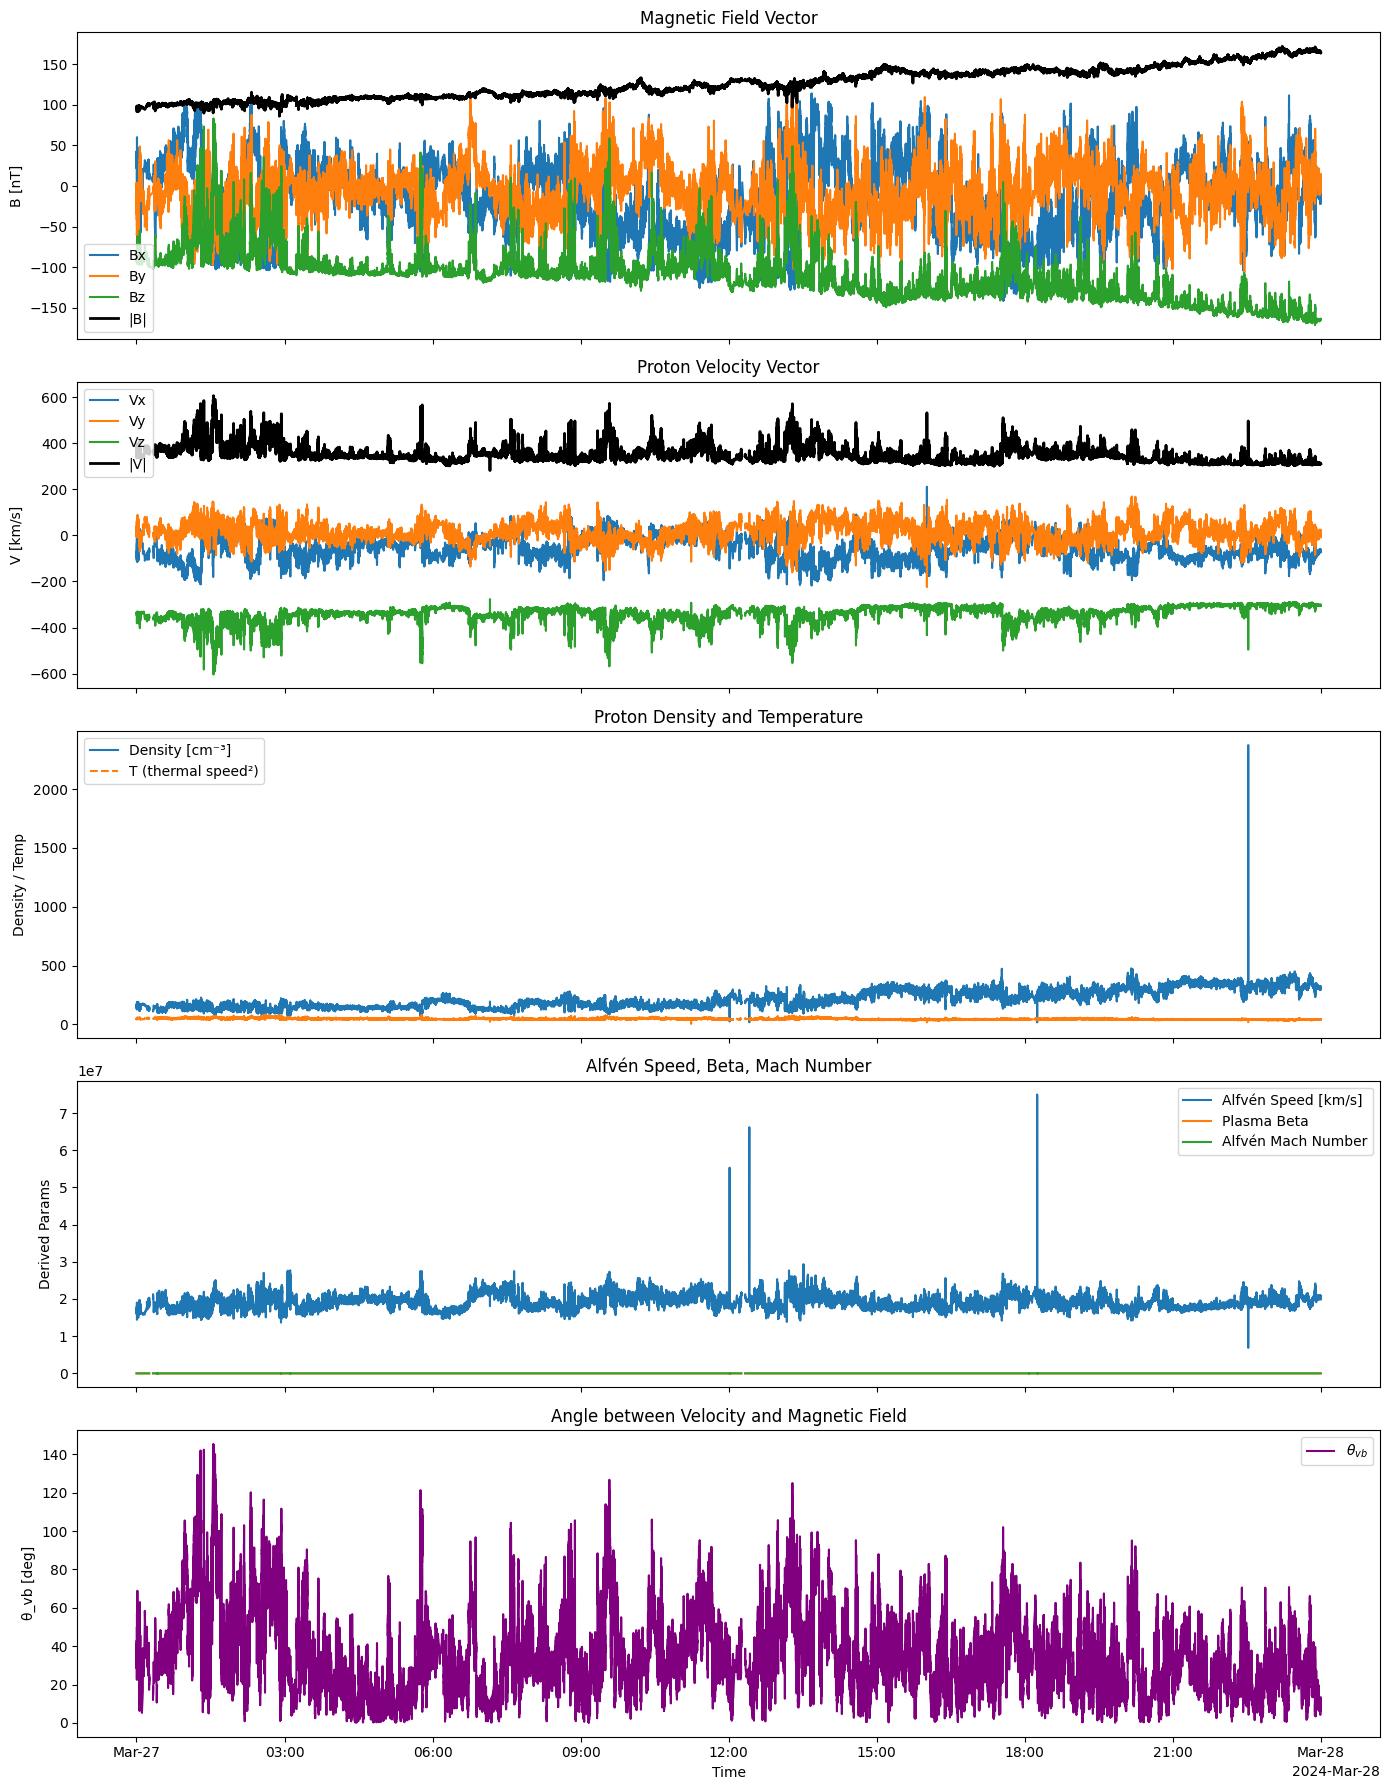

In [37]:
B_vec = B_vec
V_vec = V_vec_SC[mask_peaktrack]
n = density[mask_peaktrack] * 1.0
T = thermal_speed[mask_peaktrack]
B_vec = np.where(B_vec <= -1e30, np.nan, B_vec)
V_vec = np.where(V_vec <= -1e30, np.nan, V_vec)
n = np.where(n <= -1e30, np.nan, n)
T = np.where(T <= -1e30, np.nan, T)
# Convert datetime64[ns] to float (in nanoseconds since epoch)
t_B_float = t_B.astype('datetime64[ns]').astype(np.float64)
#t_SC_float = t_SC.astype('datetime64[ns]').astype(np.float64)
t_SC_float = t_SC[mask_peaktrack].astype('datetime64[ns]').astype(np.float64)

"""
 Interpolate magnetic field to match plasma cadence. Low-res onto a high-res grid has gaps with sometimes
 nothing dictating what is in between. Downsampling fixes this issue. Interpolation assumes smoothness of
 the data. Interpolating plasma paramters can create fake structures, nonexistent in real plasma.


 """

B_vec_interp = np.stack([
    np.interp(t_SC_float, t_B_float, B_vec[:, i])
    for i in range(3)
], axis=-1)

# Clean invalid values
B_vec_interp = np.where(B_vec_interp <= -1e30, np.nan, B_vec_interp)

t = t_SC[mask_peaktrack]

B_mag = np.linalg.norm(B_vec_interp, axis = 1)
V_mag = np.linalg.norm(V_vec, axis = 1)

v_A = (2.18*10**6) * B_mag / np.sqrt(n)

beta_p = 0.03948 * (n * T) / (B_mag**2)

M_A = V_mag / v_A



dot_product = np.nansum(V_vec * B_vec_interp, axis = 1)
theta_vb = np.degrees(np.arccos(dot_product / (V_mag * B_mag)))

fig, axs = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# Panel 1: Magnetic Field
axs[0].plot(t, B_vec_interp[:, 0], label='Bx')
axs[0].plot(t, B_vec_interp[:, 1], label='By')
axs[0].plot(t, B_vec_interp[:, 2], label='Bz')
axs[0].plot(t, B_mag, label='|B|', linewidth=2, color='k')
axs[0].set_ylabel('B [nT]')
axs[0].legend()
axs[0].set_title('Magnetic Field Vector')

# Panel 2: Velocity
axs[1].plot(t, V_vec[:, 0], label='Vx')
axs[1].plot(t, V_vec[:, 1], label='Vy')
axs[1].plot(t, V_vec[:, 2], label='Vz')
axs[1].plot(t, V_mag, label='|V|', linewidth=2, color='k')
axs[1].set_ylabel('V [km/s]')
axs[1].legend()
axs[1].set_title('Proton Velocity Vector')

# Panel 3: Density and Temperature
axs[2].plot(t, n, label='Density [cm⁻³]')
axs[2].plot(t, T, label='T (thermal speed²)', linestyle='--')
axs[2].set_ylabel('Density / Temp')
axs[2].legend()
axs[2].set_title('Proton Density and Temperature')

# Panel 4: Derived Parameters
axs[3].plot(t, v_A, label='Alfvén Speed [km/s]')
axs[3].plot(t, beta_p, label='Plasma Beta')
axs[3].plot(t, M_A, label='Alfvén Mach Number')
axs[3].set_ylabel('Derived Params')
axs[3].legend()
axs[3].set_title('Alfvén Speed, Beta, Mach Number')

# Panel 5: Theta_vb
axs[4].plot(t, theta_vb, label=r'$\theta_{vb}$', color='purple')
axs[4].set_ylabel('θ_vb [deg]')
axs[4].legend()
axs[4].set_title('Angle between Velocity and Magnetic Field')

axs[4].set_xlabel('Time')
fig.tight_layout()

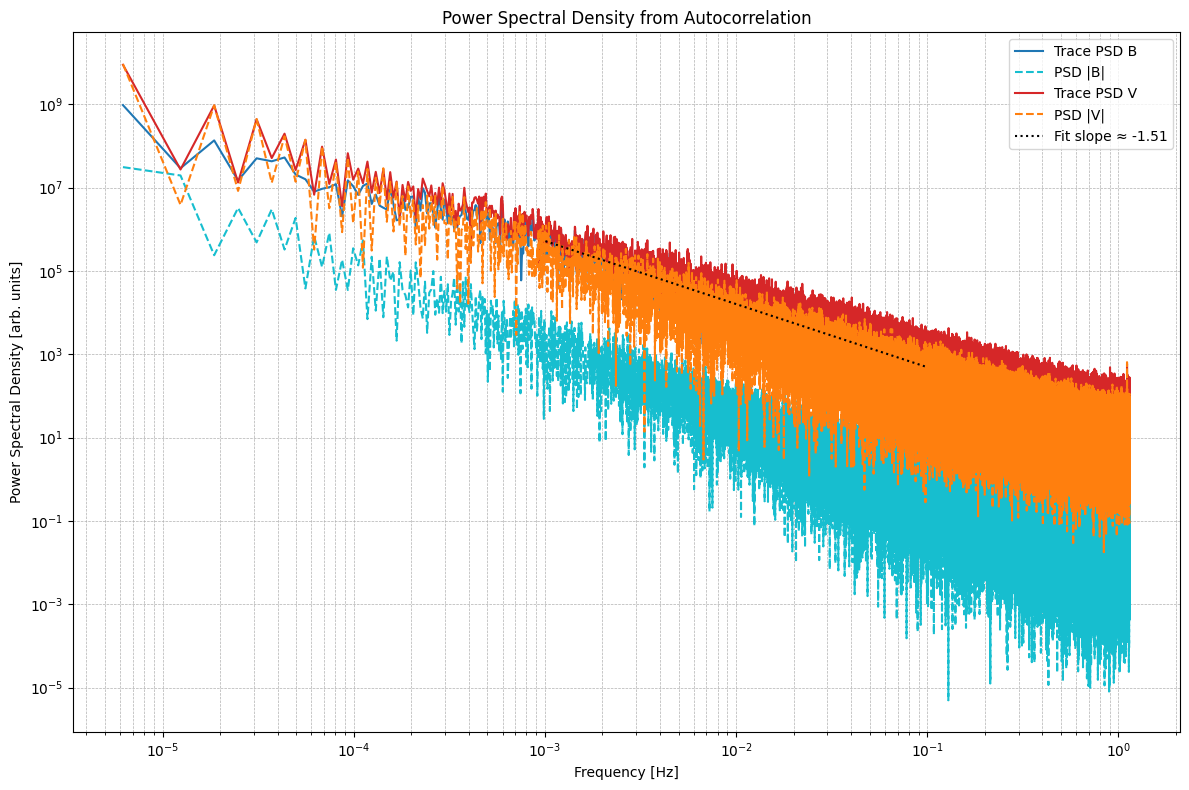

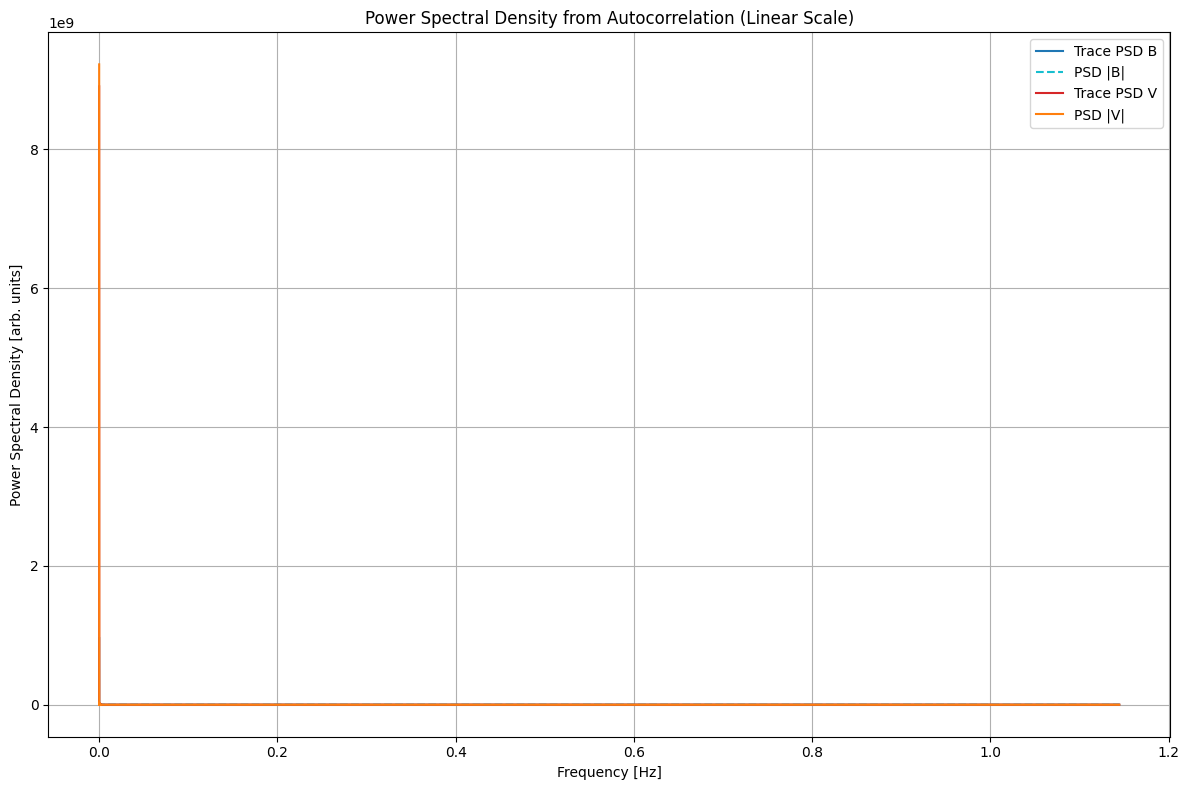

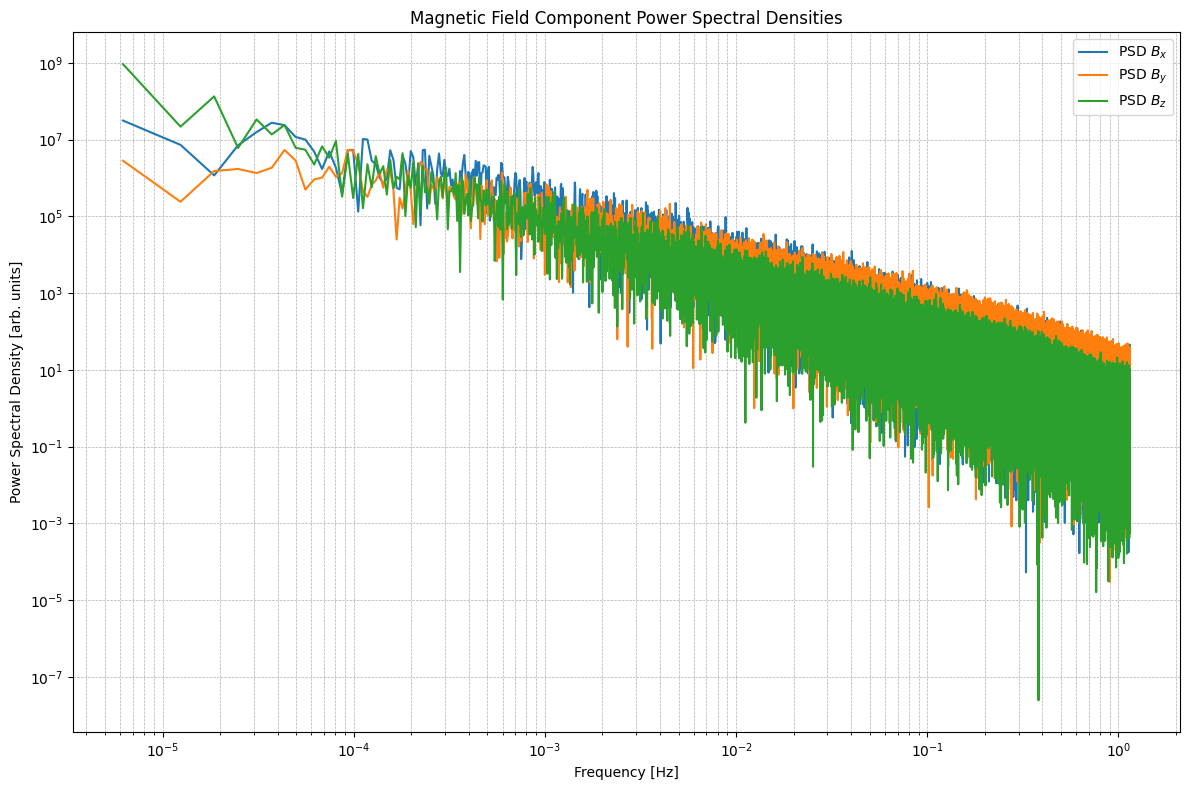

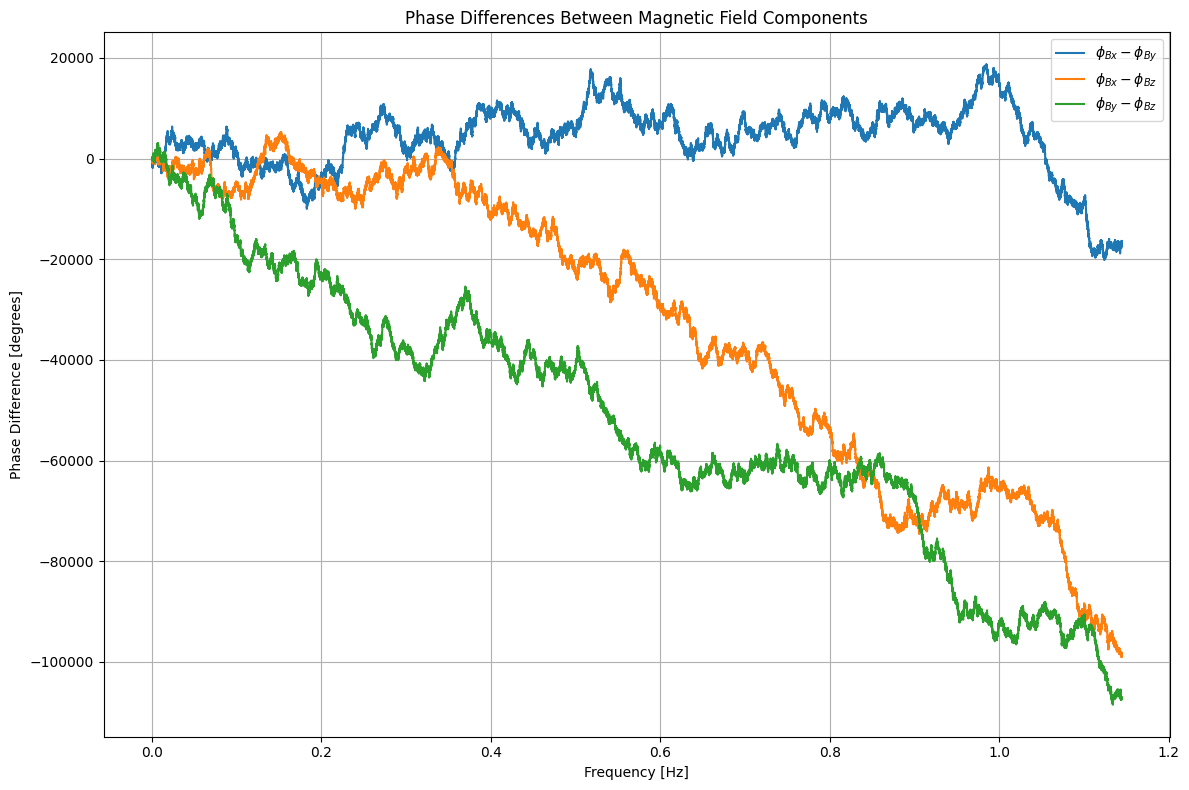

Trace PSD B slope: -1.51


In [38]:
import scipy as sp
from scipy.signal import correlate
from scipy.signal import correlation_lags
from scipy.fft import fft, fftfreq

dt_seconds = np.median(np.diff(t.astype('datetime64[ns]').astype(np.float64))) * 1e-9


def compute_psd(signal, dt) :
    signal = np.nan_to_num(signal, nan=0.0)
    acf = correlate(signal, signal, mode='full', method='auto')
   # acf = acf / acf[len(acf) // 2]
  #  mid = len(acf) // 2
   # acf = acf[mid:]
    
   # fft_vals = fft(acf)
    fft_vals = np.fft.fft(acf)
    N = len(signal)
    psd = (np.abs(fft_vals) / N)
    freq = fftfreq(len(acf), d=dt)
    mask = freq > 0
    return freq[mask], psd[mask], acf

psd_B = []
psd_V = []
freq = None
for i in range(3):
    f_B, P_B, _ = compute_psd(B_vec_interp[:, i], dt_seconds)
    f_V, P_V, _ = compute_psd(V_vec[:, i], dt_seconds)
    psd_B.append(P_B)
    psd_V.append(P_V)
    if freq is None:
        freq = f_B  

from scipy.stats import linregress

mask = (freq > 1e-3) & (freq < 1e-1)


trace_B = np.nansum(psd_B, axis=0)
slope, intercept, *_ = linregress(np.log10(freq[mask]), np.log10(trace_B[mask]))

trace_V = np.nansum(psd_V, axis=0)

B_mag_detrended = B_mag - np.nanmean(B_mag)
V_mag_detrended = V_mag #- np.nanmean(V_mag)

f_Bx, P_Bx, _ = compute_psd(B_vec_interp[:, 0], dt_seconds)
f_By, P_By, _ = compute_psd(B_vec_interp[:, 1], dt_seconds)
f_Bz, P_Bz, _ = compute_psd(B_vec_interp[:, 2], dt_seconds)

f_Bmag, P_Bmag, _ = compute_psd(B_mag_detrended, dt_seconds)
f_Vmag, P_Vmag, _ = compute_psd(V_mag_detrended, dt_seconds)

# Plotting
plt.figure(figsize=(12, 8))

plt.loglog(freq, trace_B, label='Trace PSD B', color='tab:blue')
plt.loglog(f_Bmag, P_Bmag, '--', label='PSD |B|', color='tab:cyan')
plt.loglog(freq, trace_V, label='Trace PSD V', color='tab:red')
plt.loglog(f_Vmag, P_Vmag, '--', label='PSD |V|', color='tab:orange')
plt.loglog(freq[mask], 10**(intercept) * freq[mask]**slope, 
           label=f'Fit slope ≈ {slope:.2f}', linestyle=':', color='black')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [arb. units]')
plt.title('Power Spectral Density from Autocorrelation')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

plt.plot(freq, trace_B, label='Trace PSD B', color='tab:blue')
plt.plot(f_Bmag, P_Bmag, '--', label='PSD |B|', color='tab:cyan')
plt.plot(freq, trace_V, label='Trace PSD V', color='tab:red')
plt.plot(f_Vmag, P_Vmag, label='PSD |V|', color='tab:orange')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [arb. units]')
plt.title('Power Spectral Density from Autocorrelation (Linear Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.loglog(f_Bx, P_Bx, label=r'PSD $B_x$', color='tab:blue')
plt.loglog(f_By, P_By, label=r'PSD $B_y$', color='tab:orange')
plt.loglog(f_Bz, P_Bz, label=r'PSD $B_z$', color='tab:green')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [arb. units]')
plt.title('Magnetic Field Component Power Spectral Densities')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

fft_Bx = fft(B_vec_interp[:, 0])
fft_By = fft(B_vec_interp[:, 1])
fft_Bz = fft(B_vec_interp[:, 2])
phase_Bx = np.angle(fft_Bx)
phase_By = np.angle(fft_By)
phase_Bz = np.angle(fft_Bz)
phase_xy = np.unwrap(phase_Bx - phase_By)
phase_xz = np.unwrap(phase_Bx - phase_Bz)
phase_yz = np.unwrap(phase_By - phase_Bz)
freq = fftfreq(len(fft_Bx), d=dt_seconds)
mask = freq > 0
plt.figure(figsize=(12, 8))

plt.plot(freq[mask], np.degrees(phase_xy[mask]), label=r'$\phi_{Bx} - \phi_{By}$')
plt.plot(freq[mask], np.degrees(phase_xz[mask]), label=r'$\phi_{Bx} - \phi_{Bz}$')
plt.plot(freq[mask], np.degrees(phase_yz[mask]), label=r'$\phi_{By} - \phi_{Bz}$')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase Difference [degrees]')
plt.title('Phase Differences Between Magnetic Field Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



print(f"Trace PSD B slope: {slope:.2f}")




In [39]:
acf = correlate(B_mag_detrended, B_mag_detrended, mode='full', method='auto')
acf.shape
lags = correlation_lags(len(B_mag_detrended), len(B_mag_detrended), mode='full')

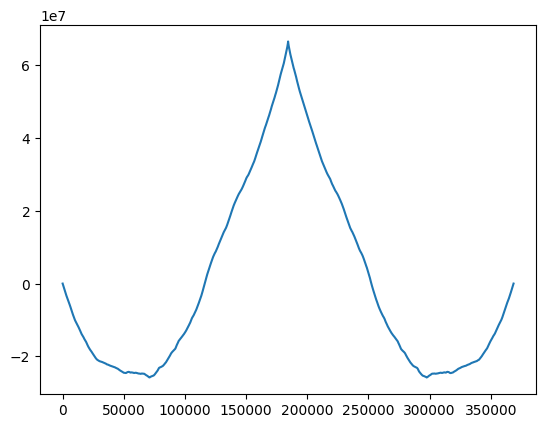

In [40]:
plt.plot(acf)

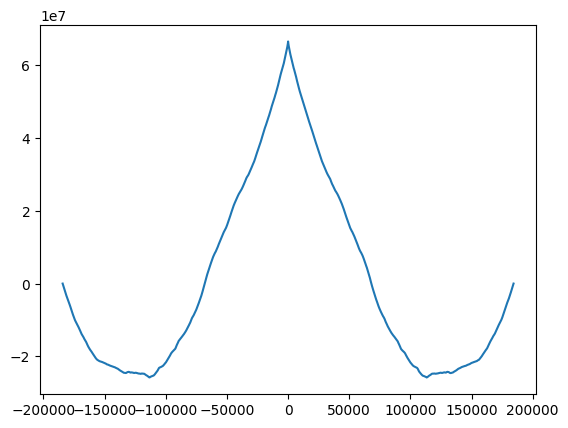

In [41]:
plt.plot(lags,acf)

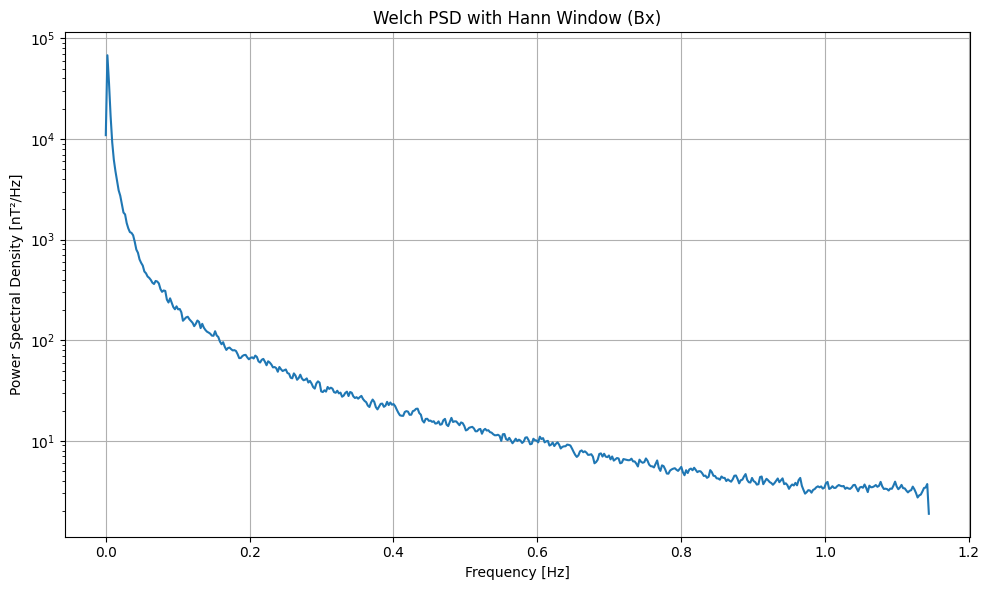

In [42]:
# Two methods of comparison: Welch method Fourier transform approximate and windowing functions (Hanning window function
# and others..).
# Median filters (ways to remove datapoints and outliers) Hampel, something else?
# Apply window function to fourier transform
import scipy
from scipy.signal import welch, hann


fs = 1 / dt_seconds  
nperseg = 1024  

f_welch, Pxx_welch = welch(B_vec_interp[:, 0], fs=fs, window='hann', nperseg=nperseg, noverlap=nperseg//2)

plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx_welch)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nT²/Hz]')
plt.title('Welch PSD with Hann Window (Bx)')
plt.grid(True)
plt.tight_layout()
plt.show()

trace_welch = (
    welch(B_vec_interp[:, 0], fs=fs, window='hann', nperseg=nperseg)[1] +
    welch(B_vec_interp[:, 1], fs=fs, window='hann', nperseg=nperseg)[1] +
    welch(B_vec_interp[:, 2], fs=fs, window='hann', nperseg=nperseg)[1]
)

from hampel import hampel

Bx_clean = hampel(B_vec_interp[:, 0], window_size=21, n_sigma = 3.5)

signal = Bx_clean.filtered_data

B_vec_clean = np.stack([
    hampel(B_vec_interp[:, i], window_size=21, n_sigma = 3.5)
    for i in range(3)
], axis=-1)

window = scipy.signal.windows.hann(len(signal))
signal_windowed = signal * window
fft_vals = fft(signal_windowed)

#Make


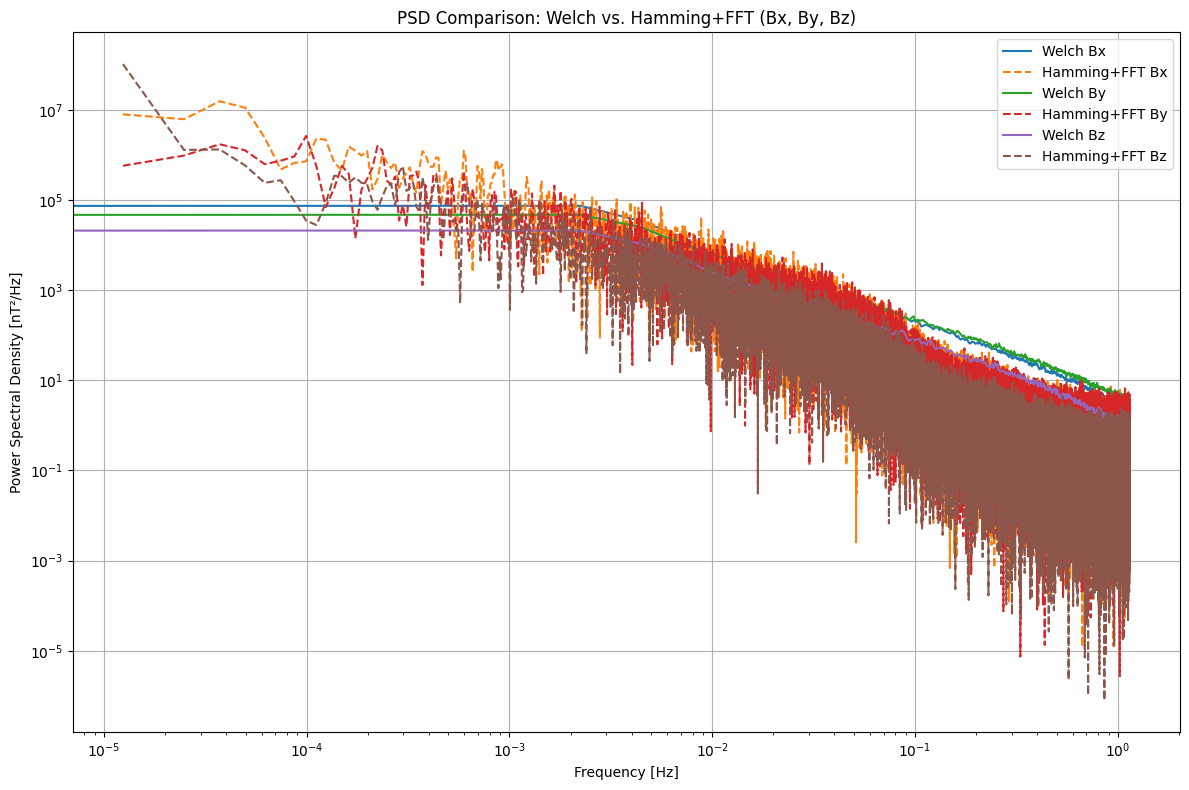

In [43]:
import scipy
from scipy.signal import welch, hann, hamming, blackman
from hampel import hampel
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

fs = 1 / dt_seconds  
nperseg = 1024  

components = ['Bx', 'By', 'Bz']
psd_welch = {}
psd_fft = {}
freq_fft = {}

plt.figure(figsize=(12, 8))

for i, comp in enumerate(components):
    # Welch PSD
    f_w, P_w = welch(B_vec_interp[:, i], fs=fs, window='hamming', nperseg=nperseg, noverlap=nperseg//2)
    psd_welch[comp] = (f_w, P_w)

    # Hampel filter
    cleaned = hampel(B_vec_interp[:, i], window_size=21, n_sigma=0.5).filtered_data

    # Window function and FFT
    window = scipy.signal.windows.hamming(len(cleaned))
    signal_windowed = cleaned * window
    fft_vals = fft(signal_windowed)
    psd = (np.abs(fft_vals)**2) / len(cleaned)
    freq = fftfreq(len(cleaned), d=dt_seconds)
    pos_mask = freq > 0

    psd_fft[comp] = psd[pos_mask]
    freq_fft[comp] = freq[pos_mask]

    # Plot Welch + FFT PSDs
    plt.loglog(f_w, P_w, label=f'Welch {comp}')
    plt.loglog(freq[pos_mask], psd[pos_mask], '--', label=f'Hamming+FFT {comp}')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nT²/Hz]')
plt.title('PSD Comparison: Welch vs. Hamming+FFT (Bx, By, Bz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
from scipy.signal import correlate, correlation_lags
import numpy as np
import pandas as pd
from scipy.stats import linregress



acf = correlate(B_mag_detrended, B_mag_detrended, mode='full', method='auto')
lags = correlation_lags(len(B_mag_detrended), len(B_mag_detrended), mode='full')
dt = dt_seconds
lags_sec = lags * dt
mid = len(acf) // 2
acf_norm = acf / acf[mid]

# Positive lags only
lags_sec_pos = lags_sec[mid:]
acf_norm_pos = acf_norm[mid:]

# Find tau_crit where acf drops below e^-1
tau_crit_idx = np.argmax(acf_norm_pos < 1 / np.e)
tau_crit = lags_sec_pos[tau_crit_idx]
print(f"τ_crit ≈ {tau_crit:.2f} seconds")
window_size = int(tau_crit / dt_seconds)
n_windows = len(B_mag_detrended) // window_size


τ_crit ≈ 17701.28 seconds


In [45]:
B_mag = np.linalg.norm(B_vec_interp, axis=1)
B_mag_detrended = B_mag - np.nanmean(B_mag)
acf = correlate(B_mag_detrended, B_mag_detrended, mode='full', method='auto')
lags = correlation_lags(len(B_mag_detrended), len(B_mag_detrended), mode='full')
lags_sec = lags * dt_seconds
mid = len(acf) // 2
acf_norm = acf / acf[mid]
lags_sec_pos = lags_sec[mid:]
acf_norm_pos = acf_norm[mid:]
tau_crit_idx = np.argmax(acf_norm_pos < 1 / np.e)
tau_crit = lags_sec_pos[tau_crit_idx]
proton_mass = 1.672622*(10**-27)
k = 1.380649*(10**-23)
mu_0 = 4.0 * np.pi * 10**-7




# Step 2: Windowing
window_size = int(tau_crit / dt_seconds)
n_windows = len(B_mag) // window_size

"""
def compute_alfven_speed(B, n):
    B_T = B * 1e-9
    rho = np.clip(n, 1e-3, None) * 1e6 * proton_mass
    return B_T / np.sqrt(mu_0 * rho)
"""
def compute_alfven_speed(B, n):
    B_nT = B * u.nT
    n = n * u.cm**(-3)
    proton_mass = c.m_p
    mu_0 = c.mu0
    rho = np.mean(n) * proton_mass
    return (B_nT / np.sqrt(mu_0 * rho)).to("km/s").value
    
def compute_plasma_beta(n, T, B):
    B_T = np.clip(B, 1e-3, None) * 1e-9
    n_m3 = np.clip(n, 1e-3, None) * 1e6
    T = np.clip(T, None, 1e7)
    return (2 * mu_0 * n_m3 * k * T) / (B_T**2)

def compute_theta_vb(V, B):
    dot = np.nansum(V * B, axis=1)
    norm_v = np.linalg.norm(V, axis=1)
    norm_b = np.linalg.norm(B, axis=1)
    cos_theta = dot / (norm_v * norm_b)
    return np.degrees(np.arccos(np.clip(cos_theta, -1, 1)))

def compute_sigma_c(V, B, eps=1e-10):
    vb = np.nansum(V * B, axis=1)
    v2 = np.nansum(V**2, axis=1)
    b2 = np.nansum(B**2, axis=1)
    denom = np.nanmean(v2 + b2)
    if denom < eps:
        return np.nan
    return 2 * np.nanmean(vb) / denom

def compute_sigma_r(V, B, eps=1e-10):
    v2 = np.nansum(V**2, axis=1)
    b2 = np.nansum(B**2, axis=1)
    denom = np.nanmean(v2 + b2)
    if denom < eps:
        return np.nan
    return (np.nanmean(v2) - np.nanmean(b2)) / denom
    
def compute_psd_components(signal, fs, nperseg=1024):
    """
    Compute PSD for each component of a 3D vector signal.
    Returns: freq, [Px, Py, Pz]
    """
    psds = []
    for i in range(3):
        f, P = welch(signal[:, i], fs=fs, window='hann', nperseg=nperseg, noverlap=nperseg//2)
        psds.append(P)
    return f, psds

def compute_elsasser(V, B, n):
    """
    Compute Elsässer variables Z+ and Z− with B normalized to velocity units.
    """
    #B_A = B * 1e-9 / np.sqrt(mu_0 * rho[:, np.newaxis])  # B in T, normalized
    b_Ax = B[:,0]
    b_Ay = B[:,1]
    b_Az = B[:,2]
    V_Ax = compute_alfven_speed(b_Ax,n)
    V_Ay = compute_alfven_speed(b_Ay,n)
    V_Az = compute_alfven_speed(b_Az,n)
    V_A  = np.vstack([V_Ax,V_Ay,V_Az]).T
    Z_plus = V + V_A
    Z_minus = V - V_A
    return Z_plus, Z_minus

03-Jul-25 15:26:59: /home/williamrkiv/miniforge3/envs/cfa_reu/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,

03-Jul-25 15:26:59: /home/williamrkiv/miniforge3/envs/cfa_reu/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)

03-Jul-25 15:26:59: /tmp/ipykernel_247606/732060826.py:27: RuntimeWarning: Mean of empty slice
  results['v_A'].append(np.nanmean(compute_alfven_speed(B_mag_win, n_win)))



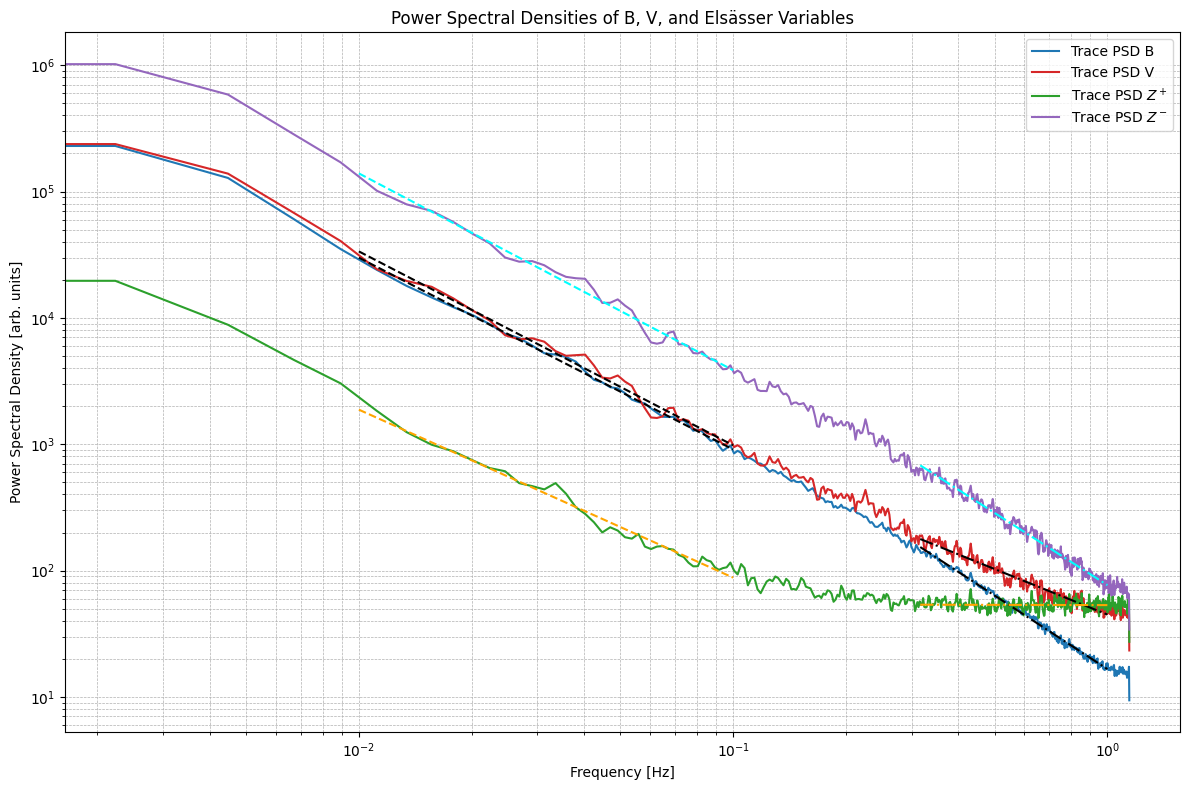

,B,V,Z+,Z-
10⁻²–10⁻¹ Hz,-1.517537,-1.534545,-1.329376,-1.557782
10⁻⁰⋅⁵–1 Hz,-1.931605,-1.195891,-0.006238,-1.896520


In [51]:
# Find cdf variable for each file for fill value attr.FILL_VAL
# Mode flag for fundamental frequency? (DQF:16 = 0, full scan mode)
# only flux angle for higher freq
# Step 3: Loop over intervals
import astropy.constants as c
import astropy.units as u

B_Va = compute_alfven_speed(B_vec_interp, n)
results = {'v_A': [], 'beta_p': [], 'theta_vb': [], 'sigma_c': [], 'sigma_r': []}
for i in range(n_windows):
    start = i * window_size
    end = start + window_size
    B = B_vec_interp[start:end]
    V = V_vec[start:end]
    n_win = n[start:end]
    v_th = np.clip(thermal_speed[start:end] * 1e3, 0, 1e6)  
    T = (proton_mass * v_th**2) / k
    B_mag_win = np.linalg.norm(B, axis=1)

    vA = compute_alfven_speed(B_mag_win, n_win)
    #beta = compute_plasma_beta(n_win, T, B_mag_win)
    beta = 1
    theta = compute_theta_vb(V, B)
    sigma_c = compute_sigma_c(V-np.nanmean(V,axis=0)[None,:], B-np.nanmean(B,axis=0)[None,:])
    sigma_r = compute_sigma_r(V-np.nanmean(V,axis=0)[None,:], B-np.nanmean(B,axis=0)[None,:])

    results['v_A'].append(np.nanmean(compute_alfven_speed(B_mag_win, n_win)))
    results['beta_p'].append(np.nanmean(beta))
    results['theta_vb'].append(np.nanmean(theta))
    results['sigma_c'].append(sigma_c)
    results['sigma_r'].append(sigma_r)
    

df = pd.DataFrame(results)
df

V = np.nan_to_num(V_vec[start:end], nan=0.0)
B = np.nan_to_num(B_vec_interp[start:end], nan=0.0)
n = np.clip(density[start:end], 1e-3, None)

#Zp, B = compute_elsasser(V, np.zeros_like(V), n)
#Zp, Zm = compute_elsasser(np.zeros_like(B), V, n)
Zp, Zm = compute_elsasser(V, B, n)


f, psd_B = compute_psd_components(B_Va, fs)
f_V, psd_V = compute_psd_components(V, fs)
f_Zp, psd_Zp = compute_psd_components((Zp - np.nanmean(Zp,axis=0)[None,:]), fs) 
f_Zm, psd_Zm = compute_psd_components(Zm, fs)

trace_B = np.nansum(psd_B,axis=0)
trace_V = np.nansum(psd_V,axis=0)
trace_Zp = np.nansum(psd_Zp,axis=0)
trace_Zm = np.nansum(psd_Zm,axis=0)

if i == 0:
    freq_storage = f

traces = {'B': [], 'V': [], 'Z+': [], 'Z-': []}
traces['B'].append(trace_B)
traces['V'].append(trace_V)
traces['Z+'].append(trace_Zp)
traces['Z-'].append(trace_Zm)

bands = [(1e-2, 1e-1), (10**-0.5, 1e0)]
def fit_log_slope(frequencies, psd_trace, f_min, f_max):
    mask = (frequencies >= f_min) & (frequencies <= f_max)
    x = np.log10(frequencies[mask])
    y = np.log10(psd_trace[mask])
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value, p_value, std_err
    
fit_results = {'Z-': [], 'B': [], 'V': []}

for label, trace in zip(['B', 'V', 'Z+', 'Z-'], [trace_B, trace_V, trace_Zp, trace_Zm]):
    slope_list = []
    for fmin, fmax in bands:
        slope, *_ = fit_log_slope(f, trace, fmin, fmax)
        slope_list.append(slope)
    fit_results.setdefault(label, []).append(slope_list)

        





# Compute slopes and intercepts for Z^-
slopes_zm = []
intercepts = []

def compute_band_fits(freqs, trace, bands):
    slopes, intercepts = [], []
    for fmin, fmax in bands:
        slope, intercept, *_ = fit_log_slope(freqs, trace, fmin, fmax)
        slopes.append(slope)
        intercepts.append(intercept)
    return slopes, intercepts

# Define frequency bands again
bands = [(1e-2, 1e-1), (10**-0.5, 1e0)]
def fitted_line(slope, intercept, f_range):
    x_fit = np.log10(f_range)
    y_fit = slope * x_fit + intercept
    return 10**x_fit, 10**y_fit
    
for fmin, fmax in bands:
    slope, intercept, *_ = fit_log_slope(f, trace_Zm, fmin, fmax)
    slopes_zm.append(slope)
    intercepts.append(intercept)

    slope_zm, *_ = fit_log_slope(f_Zm, trace_Zm, fmin, fmax)
    slope_b,  *_ = fit_log_slope(f, trace_B, fmin, fmax)
    slope_v,  *_ = fit_log_slope(f_V, trace_V, fmin, fmax)
    fit_results['Z-'].append(slope_zm)
    fit_results['B'].append(slope_b)
    fit_results['V'].append(slope_v)




slopes_b, intercepts_b = compute_band_fits(f, trace_B, bands)
slopes_v, intercepts_v = compute_band_fits(f_V, trace_V, bands)
slopes_zp, intercepts_zp = compute_band_fits(f_Zp, trace_Zp, bands)
slopes_zm, intercepts_zm = compute_band_fits(f_Zm, trace_Zm, bands)


# --- Plot PSDs ---
plt.figure(figsize=(12, 8))

plt.loglog(f, trace_B, label='Trace PSD B', color='tab:blue')
plt.loglog(f_V, trace_V, label='Trace PSD V', color='tab:red')
plt.loglog(f, trace_Zp, label=r'Trace PSD $Z^+$', color='tab:green')
plt.loglog(f, trace_Zm, label=r'Trace PSD $Z^-$', color='tab:purple')

line_styles = ['--', '-.']
fit_colors = ['black', 'black', 'orange', 'cyan']  # Extra colors to distinguish

# Collect all slope/intercept/freq pairs
fit_data = [
    (slopes_b, intercepts_b, f_B),
    (slopes_v, intercepts_v, f_V),
    (slopes_zp, intercepts_zp, f_Zp),
    (slopes_zm, intercepts_zm, f_Zm),
]

for i, (slopes, intercepts, freqs) in enumerate(fit_data):
    for j, (fmin, fmax) in enumerate(bands):
        x_fit, y_fit = fitted_line(slopes[j], intercepts[j], [fmin, fmax])
        plt.plot(x_fit, y_fit, linestyle=line_styles[j], color=fit_colors[i])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [arb. units]')
plt.title('Power Spectral Densities of B, V, and Elsässer Variables')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
df

fit_summary = pd.DataFrame({
    'B': slopes_b,
    'V': slopes_v,
    'Z+': slopes_zp,
    'Z-': slopes_zm,
}, index=['10⁻²–10⁻¹ Hz', '10⁻⁰⋅⁵–1 Hz'])

fit_summary

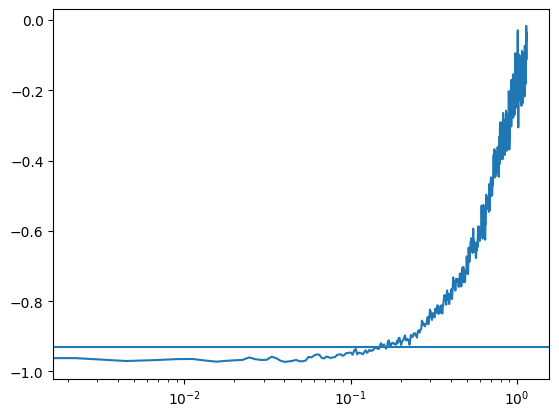

In [52]:
trace_psd_Zp = np.sum(psd_Zp,axis=0)
trace_psd_Zm = np.sum(psd_Zm,axis=0)
plt.semilogx(f,(trace_psd_Zp-trace_psd_Zm)/(trace_psd_Zp+trace_psd_Zm))
plt.axhline(-0.93)

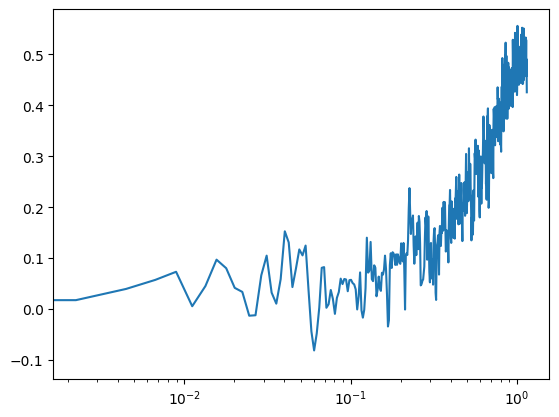

In [53]:
trace_psd_V = np.sum(psd_V,axis=0)
trace_psd_B = np.sum(psd_B,axis=0)
plt.semilogx(f,(trace_psd_V-trace_psd_B)/(trace_psd_V+trace_psd_B))

In [49]:
np.shape(psd_Zp)

(3, 513)

ValueError: x and y must have same first dimension, but have shapes (41822,) and (40515, 3)

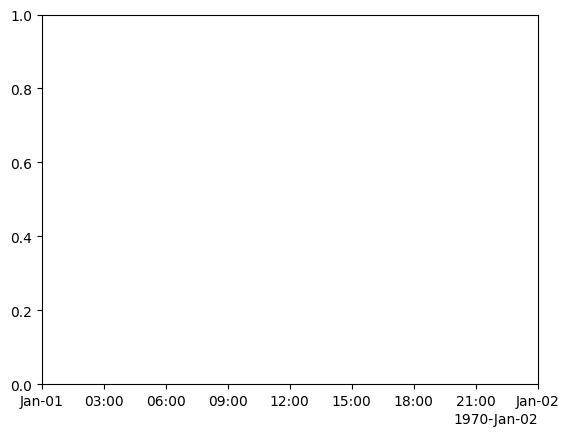

In [50]:
new_t = t[0:41822]
plt.plot(new_t,B)

In [ ]:
np.linalg.norm(B, axis=1)

In [ ]:
compute_alfven_speed(np.linalg.norm(B, axis=1),np.ones(len(B))*500)/1000

In [ ]:
def compute_psd_components(signal, fs, nperseg=1024):
    """
    Compute PSD for each component of a 3D vector signal.
    Returns: freq, [Px, Py, Pz]
    """
    psds = []
    for i in range(3):
        f, P = welch(signal[:, i], fs=fs, window='hann', nperseg=nperseg, noverlap=nperseg//2)
        psds.append(P)
    return f, psds

def compute_mag_alfu(B, n):
    B_T = B * 1e-9
    rho = np.mean(n) * 1e6 * proton_mass
    return B_T / np.sqrt(mu_0 * rho)



In [ ]:
B_Va = compute_mag_alfu(B, n)
f, psd_B = compute_psd_components(B, fs)
f, psd_BVa = compute_psd_components(B_Va, fs)

In [ ]:
plt.loglog(f,np.nansum(psd_B,axis=0))
plt.loglog(f,np.nansum(psd_BVa,axis=0))

In [ ]:
def compute_astromag_alfu(B, n):
    B_nT = B * u.nT
    n = n * u.cm**(-3)
    proton_mass = c.m_p
    mu_0 = c.mu0
    rho = np.mean(n) * proton_mass
    return (B_nT / np.sqrt(mu_0 * rho)).to("km/s")

In [ ]:
B_Vaa = compute_astromag_alfu(B,n)
f, psd_BVaa = compute_psd_components(B_Vaa, fs)

In [ ]:
plt.loglog(f,np.nansum(psd_BVaa,axis=0))
plt.loglog(f,np.nansum(psd_B,axis=0))

In [ ]:
sep = np.array(psd_BVa)/np.array(psd_BVaa)

In [ ]:
sep

In [ ]:
B_Vaa.value